In [18]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify
import plotly.express as px  
import plotly.graph_objects as go  
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("Marvel Vs DC NEW.csv" ,  encoding= 'unicode_escape') 
df.sample(7)

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score
14,14,Shang-Chi and the Legend of the Ten Rings,-2021,"Action,Adventure,Fantasy",0,"The movie, based on Marvel Comics, will focus ...",0.0
1552,1552,Constantine: City of Demons,(2018â2019),"Animation,Short,Fantasy",6 min,Rachel unknowingly recounts the events of Newc...,8.2
1339,1339,Lucifer,(2016â ),"Crime,Drama,Fantasy",42 min,In an effort to get over his infatuation with ...,8.5
1629,1629,Supergirl,(2015â2021),"Action,Adventure,Drama",42 min,When a shocking revelation brings chaos to Nat...,7.2
1496,1496,Young Justice,(2010â ),"Animation,Action,Adventure",23 min,"In the calm before the storm, Artemis and Conn...",9.0
1021,1021,Smallville,(2001â2011),"Adventure,Drama,Romance",42 min,When the foster mother and chief of staff of M...,8.0
979,979,Teen Titans,(2003â2006),"Animation,Action,Adventure",23 min,The Titans get a distress call from Russia. Th...,7.8


### Eliminamos lo que sea 0

<AxesSubplot: >

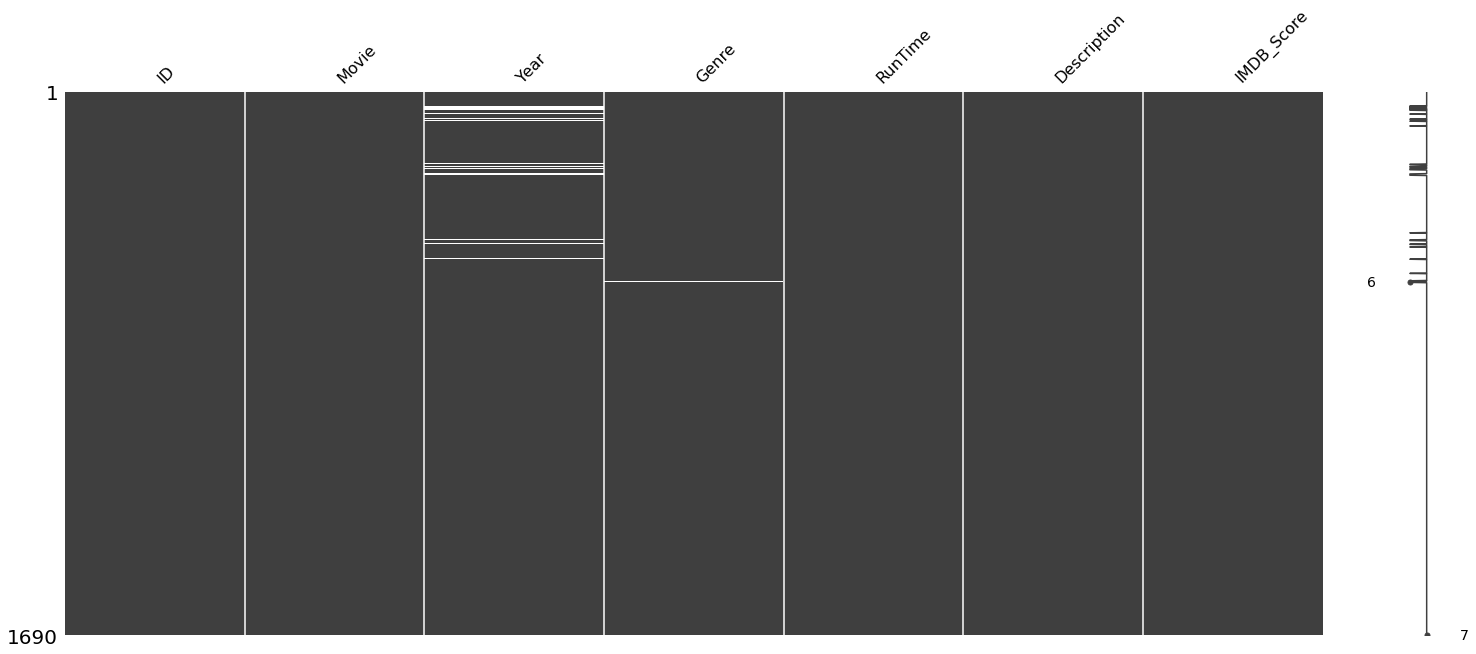

In [20]:
msno.matrix(df)

In [21]:
df['RunTime(Min)'] = df['RunTime'].str.split(expand=True)[0]
df['RunTime(Min)'].sample(9)

957      41
72      223
1236     20
1200      0
1658     42
1540     42
201       0
595      22
222       0
Name: RunTime(Min), dtype: object

In [22]:
# Extract starting and ending years using regex
df[['StartYear', 'EndYear']] = df['Year'].str.extract(r'(\d{4})[^\d]*(\d{4}| )')

# Clean up EndYear to handle cases with ' ' (no ending year)
df['EndYear'] = df['EndYear'].replace(' ', 'No End Year')

# Display the updated DataFrame
print(df[['Year', 'StartYear', 'EndYear']])

               Year StartYear      EndYear
0             -2021       NaN          NaN
1        (2021â )      2021  No End Year
2             -2021       NaN          NaN
3             -2021       NaN          NaN
4             -2021       NaN          NaN
...             ...       ...          ...
1685     (2016â )      2016  No End Year
1686  (2015â2021)      2015         2021
1687  (2015â2021)      2015         2021
1688  (2015â2021)      2015         2021
1689  (2015â2021)      2015         2021

[1690 rows x 3 columns]


In [23]:
df[['Year', 'StartYear', 'EndYear']].sample(8)

,Year,StartYear,EndYear
800,(2001â2004),2001,2004
670,(1992â1995),1992,1995
591,(II) (1993 Video Game),1993,No End Year
1166,(2001â2011),2001,2011
686,(1992â1995),1992,1995
1412,(2015â2018),2015,2018
933,(2001â2011),2001,2011
376,(2013â2020),2013,2020


In [24]:
df['Movie'].unique()

array(['Eternals', 'Loki', 'The Falcon and the Winter Soldier',
       'WandaVision', 'Spider-Man: No Way Home', 'Black Widow',
       'Avengers: Endgame', 'Guardians of the Galaxy',
       'Thor: Love and Thunder', 'Spider-Man: Far from Home',
       'Thor: Ragnarok', 'Avengers: Infinity War', 'Black Panther',
       'Captain Marvel', 'Shang-Chi and the Legend of the Ten Rings',
       'Spider-Man: Homecoming', 'Avengers: Age of Ultron',
       'Captain America: The First Avenger',
       'Guardians of the Galaxy Vol. 2', 'Thor', 'Iron Man',
       'Captain America: Civil War', 'The Avengers',
       'Doctor Strange in the Multiverse of Madness', 'Brightburn',
       'Doctor Strange', 'Ant-Man', 'Captain America: The Winter Soldier',
       'Iron Man 3', 'What If...?', 'Black Panther: Wakanda Forever',
       'Thor: The Dark World', 'Iron Man 2', 'Spider-Man 3',
       'Ant-Man and the Wasp', 'The Incredible Hulk', 'Hawkeye',
       'Guardians of the Galaxy Vol. 3', 'The Marvels', 'Mo

In [26]:
marvel_most_frequent_keywords = [
    "Iron Man", "Tony Stark", "Captain America", "Steve Rogers", "Thor", "Hulk", 
    "Bruce Banner", "Spider-Man", "Peter Parker", "Black Widow", "Natasha Romanoff", 
    "Doctor Strange", "Stephen Strange", "Black Panther", "T'Challa", "Ant-Man", 
    "Scott Lang", "Captain Marvel", "Carol Danvers", "Hawkeye", "Clint Barton", 
    "Scarlet Witch", "Wanda Maximoff", "Vision", "Loki", "Thanos", "Nick Fury", 
    "Star-Lord", "Peter Quill", "Gamora", "Rocket Raccoon", "Groot", "Deadpool", 
    "Wolverine", "Logan", "Silver Surfer", "Daredevil", "Matt Murdock", "Winter Soldier", 
    "Bucky Barnes", "Avengers", "Hero", "Villain", "Superpower", "Infinity", "Asgard", 
    "Shield", "Superhero", "Power", "Universe", "Battle", "Origin", "War", "Quantum", 
    "Multiverse", "Technology", "Transformation", "Alliance", "Legacy", "Time", 
    "Space", "Justice", "Wakanda", "Stark", "Mutant", "S.H.I.E.L.D.", "Gem", "Crossover", 
    "Team", "God", "Cosmic", "Destiny", "Drax", "Jessica Jones", "Luke Cage", 
    "X-Men", "Fantastic Four", "Venom", "Ghost Rider", "The Punisher", "The Eternals", 
    "Blade", "Hank Pym", "Magneto"
]


dc_most_frequent_keywords = [
    "Batman", "Superman", "Justice", "League", "Dark", "Knight", "Wonder Woman", 
    "Suicide Squad", "Man of Steel", "Gotham", "Green Lantern", "Flash", "Arrow", 
    "Titans", "Shazam", "Aquaman", "Joker", "Birds of Prey", "Vengeance", "Crisis", 
    "Return", "Rise", "Legends", "Hero", "Dawn", "Tomorrow", "Gods", "Power", 
    "World", "Origin", "Reign", "Son", "War", "Throne", "Watchmen", "Phantom", 
    "Enemy", "Universe", "Blood", "Redemption", "Doomsday", "Apocalypse", "End",
     
    "Constantine", "Catwoman", "Jonah Hex", "Nightwing", "Robin", "Supergirl", 
    "Zatanna", "Swamp Thing", "Blue Beetle", "Black Adam", "Vixen", "Harley Quinn", 
    "Static Shock", "Hawkman", "Green Arrow", "Batgirl", "Superboy", "Darkseid", 
    "Deathstroke", "Lobo", "Spectre", "The Question", "Red Hood", "Lucifer", 
    "Steel", "Raven", "Huntress", "Booster Gold", "Mr. Terrific", "Black Canary", 
    "The Atom", "Martian Manhunter", "Dr. Fate", "Black Lightning", "Firestorm", 
    "Etrigan", "The Demon", "Orion", "Metamorpho", "Azrael", "Deadshot", 
    "Solomon Grundy", "Doctor Manhattan"
]

In [27]:
def dc_or_Marvel (title):
    for keyword in marvel_most_frequent_keywords:
        if keyword in title:
            return 'Marvel'
    for keyword in dc_most_frequent_keywords:
        if keyword in title:
            return 'DC'
    return 'Unknown'   


df['dc/marvel'] =df['Movie'].apply(dc_or_Marvel)
df.sample(7)

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score,RunTime(Min),StartYear,EndYear,dc/marvel
918,918,Smallville,(2001â2011),"Adventure,Drama,Romance",44 min,A woman appears in Smallville claiming that Cl...,8.1,44,2001,2011,Unknown
386,386,Entertainment Tonight Canada,(2005â ),"Biography,Family,News",0,a Plot,0.0,0,2005,No End Year,Unknown
1317,1317,Gotham,(2014â2019),"Action,Crime,Drama",44 min,Gordon runs into a hitman known as Eduardo Fla...,8.5,44,2014,2019,DC
546,546,Saving Gotham City,(2005 Video),"Documentary,Short",13 min,A look at the effects work for the film Batman...,7.1,13,2005,No End Year,DC
175,175,Mutant X,(2001â2004),"Action,Adventure,Drama",43 min,Discovering that their teammate Lexa is the su...,5.6,43,2001,2004,Marvel
361,361,Agents of S.H.I.E.L.D.,(2013â2020),"Action,Adventure,Drama",42 min,After finding themselves in yet another gambli...,8.0,42,2013,2020,Marvel
731,731,The Batman,(2004â2008),"Animation,Action,Adventure",22 min,After a physical trauma causes him to forget h...,7.6,22,2004,2008,DC


In [28]:
df['dc/marvel'].sample(7)

524          DC
361      Marvel
990     Unknown
1618    Unknown
927     Unknown
966     Unknown
1089    Unknown
Name: dc/marvel, dtype: object